# > Spotify Track Popularity Project

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.model_selection import StratifiedKFold
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import f1_score
from imblearn.over_sampling import SMOTE

In [55]:
# Import Kaggle dataset
df = pd.read_csv('dataset-spotify.csv', index_col=0)

df.head(10)

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic
5,01MVOl9KtVTNfFiBU9I7dc,Tyrone Wells,Days I Will Remember,Days I Will Remember,58,214240,False,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,0.1890,0.6660,98.017,4,acoustic
6,6Vc5wAMmXdKIAM7WUoEb7N,A Great Big World;Christina Aguilera,Is There Anybody Out There?,Say Something,74,229400,False,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,0.0913,0.0765,141.284,3,acoustic
7,1EzrEOXmMH3G43AXT1y7pA,Jason Mraz,We Sing. We Dance. We Steal Things.,I'm Yours,80,242946,False,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,0.0973,0.7120,150.960,4,acoustic
8,0IktbUcnAGrvD03AWnz3Q8,Jason Mraz;Colbie Caillat,We Sing. We Dance. We Steal Things.,Lucky,74,189613,False,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,0.1510,0.6690,130.088,4,acoustic
9,7k9GuJYLp2AzqokyEdwEw2,Ross Copperman,Hunger,Hunger,56,205594,False,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,0.0735,0.1960,78.899,4,acoustic


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 114000 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          114000 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        114000 non-null  int64  
 5   duration_ms       114000 non-null  int64  
 6   explicit          114000 non-null  bool   
 7   danceability      114000 non-null  float64
 8   energy            114000 non-null  float64
 9   key               114000 non-null  int64  
 10  loudness          114000 non-null  float64
 11  mode              114000 non-null  int64  
 12  speechiness       114000 non-null  float64
 13  acousticness      114000 non-null  float64
 14  instrumentalness  114000 non-null  float64
 15  liveness          114000 non-null  float64
 16  valence           11

In [4]:
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,114000.000000,1.140000e+05,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000,114000.000000
mean,33.238535,2.280292e+05,0.566800,0.641383,5.309140,-8.258960,0.637553,0.084652,0.314910,0.156050,0.213553,0.474068,122.147837,3.904035
std,22.305078,1.072977e+05,0.173542,0.251529,3.559987,5.029337,0.480709,0.105732,0.332523,0.309555,0.190378,0.259261,29.978197,0.432621
min,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.740660e+05,0.456000,0.472000,2.000000,-10.013000,0.000000,0.035900,0.016900,0.000000,0.098000,0.260000,99.218750,4.000000
50%,35.000000,2.129060e+05,0.580000,0.685000,5.000000,-7.004000,1.000000,0.048900,0.169000,0.000042,0.132000,0.464000,122.017000,4.000000
75%,50.000000,2.615060e+05,0.695000,0.854000,8.000000,-5.003000,1.000000,0.084500,0.598000,0.049000,0.273000,0.683000,140.071000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


In [5]:
print(df.isnull().sum())  # Check for missing values

track_id            0
artists             1
album_name          1
track_name          1
popularity          0
duration_ms         0
explicit            0
danceability        0
energy              0
key                 0
loudness            0
mode                0
speechiness         0
acousticness        0
instrumentalness    0
liveness            0
valence             0
tempo               0
time_signature      0
track_genre         0
dtype: int64


In [6]:
# Remove rows with missing values
df = df.dropna()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113999 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113999 non-null  object 
 1   artists           113999 non-null  object 
 2   album_name        113999 non-null  object 
 3   track_name        113999 non-null  object 
 4   popularity        113999 non-null  int64  
 5   duration_ms       113999 non-null  int64  
 6   explicit          113999 non-null  bool   
 7   danceability      113999 non-null  float64
 8   energy            113999 non-null  float64
 9   key               113999 non-null  int64  
 10  loudness          113999 non-null  float64
 11  mode              113999 non-null  int64  
 12  speechiness       113999 non-null  float64
 13  acousticness      113999 non-null  float64
 14  instrumentalness  113999 non-null  float64
 15  liveness          113999 non-null  float64
 16  valence           11

In [8]:
# Count duplicate rows
duplicadas = df.duplicated().sum()

print(f"Duplicated rows: {duplicadas}")

Duplicated rows: 450


In [8]:
linhas_duplicadas = df[df.duplicated()]
print(linhas_duplicadas)

                      track_id                  artists  \
1925    0CDucx9lKxuCZplLXUz0iX   Buena Onda Reggae Club   
2155    2aibwv5hGXSgw7Yru8IYTO    Red Hot Chili Peppers   
3738    7mULVp0DJrI2Nd6GesLvxn             Joy Division   
4648    6d3RIvHfVkoOtW1WHXmbX3          Little Symphony   
5769    481beimUiUnMUzSbOAFcUT             SUPER BEAVER   
...                        ...                      ...   
111246  0sSjIvTvd6fUSZZ5rnTPDW  Everything But The Girl   
111362  2zg3iJW4fK7KZgHOvJU67z                Faithless   
111980  46FPub2Fewe7XrgM0smTYI                Morcheeba   
112968  6qVA1MqDrDKfk9144bhoKp              Acil Servis   
113345  5WaioelSGekDk3UNQy8zaw              Matt Redman   

                                              album_name  \
1925                                             Disco 2   
2155                                    Stadium Arcadium   
3738                                  Timeless Rock Hits   
4648                                            Ser

In [9]:
df.loc[df['track_id']=='0CDucx9lKxuCZplLXUz0iX']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
1874,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238,0.86,0.0571,0.843,90.522,4,afrobeat
1925,0CDucx9lKxuCZplLXUz0iX,Buena Onda Reggae Club,Disco 2,Song for Rollins,16,219346,False,0.841,0.577,0,-7.544,1,0.0438,0.238,0.86,0.0571,0.843,90.522,4,afrobeat


In [10]:
# Remove duplicate rows
df = df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Data columns (total 20 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           11

#### > EDA - Exploratory Data Analysis

In [11]:
# Check number of rows and columns
df_shape = df.shape
print(f'The dataframe has {df_shape[0]} rows and {df_shape[1]} columns.')

The dataframe has 113549 rows and 20 columns.


In [12]:
# View dataframe statistics
df.describe()

,popularity,duration_ms,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature
count,113549.000000,1.135490e+05,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000,113549.000000
mean,33.324433,2.280814e+05,0.567031,0.642091,5.309452,-8.243408,0.637866,0.084674,0.314064,0.155703,0.213613,0.474205,122.175745,3.904218
std,22.283855,1.064131e+05,0.173409,0.251053,3.560147,5.011422,0.480620,0.105762,0.331906,0.309217,0.190462,0.259204,29.972954,0.432117
min,0.000000,8.586000e+03,0.000000,0.000000,0.000000,-49.531000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17.000000,1.741840e+05,0.456000,0.473000,2.000000,-9.998000,0.000000,0.035900,0.016800,0.000000,0.098000,0.260000,99.296000,4.000000
50%,35.000000,2.130000e+05,0.580000,0.685000,5.000000,-6.997000,1.000000,0.048900,0.168000,0.000041,0.132000,0.464000,122.020000,4.000000
75%,50.000000,2.615880e+05,0.695000,0.854000,8.000000,-5.001000,1.000000,0.084500,0.596000,0.048700,0.273000,0.683000,140.074000,4.000000
max,100.000000,5.237295e+06,0.985000,1.000000,11.000000,4.532000,1.000000,0.965000,0.996000,1.000000,1.000000,0.995000,243.372000,5.000000


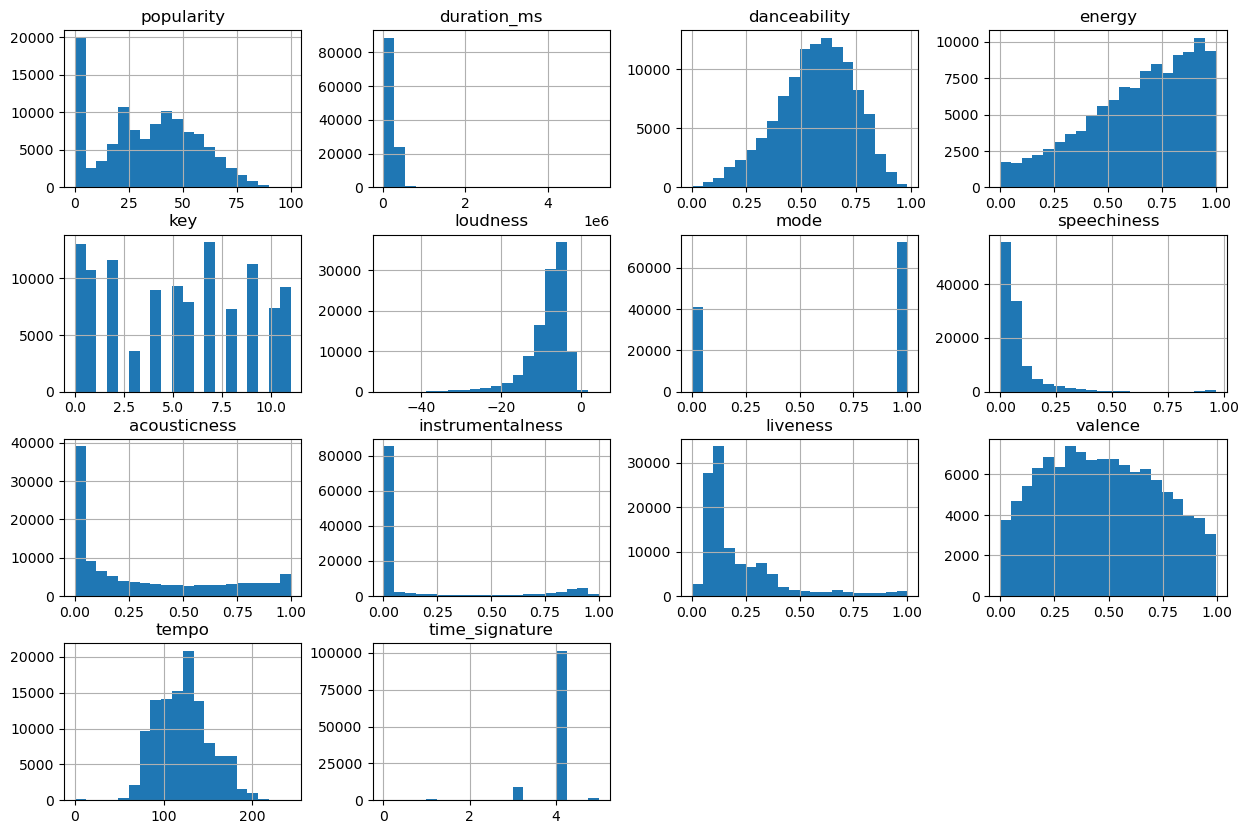

In [13]:
# Visualize numerical features
df.hist(bins=20, figsize=(15, 10))
plt.show()

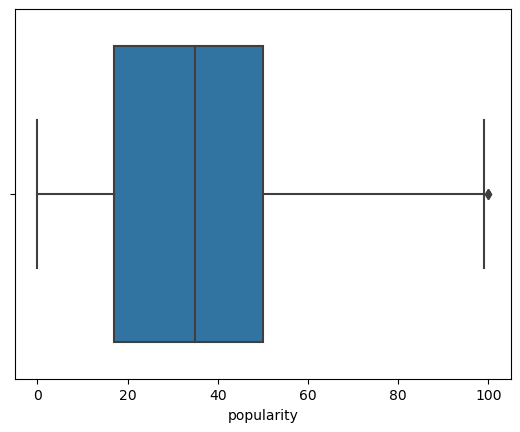

In [13]:
# Check for outliers
sns.boxplot(x=df['popularity'])
plt.show()

In [15]:
df['popularity'].max()

100

In [14]:
num_outliers = (df["popularity"] == 100).sum()
print(f"Number of rows with outliers (popularity = 100): {num_outliers}")

Number of rows with outliers (popularity = 100): 2


In [15]:
outlier_row = df[df["popularity"] == 100]
print(outlier_row)

                     track_id               artists  \
20001  3nqQXoyQOWXiESFLlDF1hG  Sam Smith;Kim Petras   
81051  3nqQXoyQOWXiESFLlDF1hG  Sam Smith;Kim Petras   

                      album_name                 track_name  popularity  \
20001  Unholy (feat. Kim Petras)  Unholy (feat. Kim Petras)         100   
81051  Unholy (feat. Kim Petras)  Unholy (feat. Kim Petras)         100   

       duration_ms  explicit  danceability  energy  key  loudness  mode  \
20001       156943     False         0.714   0.472    2    -7.375     1   
81051       156943     False         0.714   0.472    2    -7.375     1   

       speechiness  acousticness  instrumentalness  liveness  valence  \
20001       0.0864         0.013          0.000005     0.266    0.238   
81051       0.0864         0.013          0.000005     0.266    0.238   

         tempo  time_signature track_genre  
20001  131.121               4       dance  
81051  131.121               4         pop  


In [16]:
df.loc[df['track_id']=='3nqQXoyQOWXiESFLlDF1hG']

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.013,0.000005,0.266,0.238,131.121,4,dance
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.013,0.000005,0.266,0.238,131.121,4,pop


##### Some questions about the data:

1) How many unique songs and artists are in the dataset?

2) How many songs per genre?

3) What is the total duration in minutes? And in hours?

4) Top 5 longest songs

5) Top 5 most popular music genres

6) Top 100 most popular songs

7) Top 5 most popular artists

In [19]:
# 1) How many unique songs and artists are in the dataset?


qt_songs = df['track_id'].nunique()
qt_artists = df['artists'].nunique()

print(f'There are {qt_songs:,}'.replace(',', '.') + f' unique songs and {qt_artists:,}'.replace(',', '.') + ' unique artists in the dataset, respectively.')

There are 89.740 unique songs and 31.437 unique artists in the dataset, respectively.


In [20]:
# 2) How many songs per genre?

genre_counts = df['track_genre'].value_counts().sort_values(ascending=False)

# Display the result
genre_counts

acoustic             1000
singer-songwriter    1000
reggae               1000
techno               1000
songwriter           1000
                     ... 
honky-tonk            981
dance                 965
german                963
classical             933
romance               904
Name: track_genre, Length: 114, dtype: int64

In [21]:
# 3) What is the total duration in minutes? And in hours?

total_duration_ms = df['duration_ms'].sum()
total_duration_minutes = total_duration_ms / (1000 * 60)  # Convert ms to minutes
total_duration_hours = total_duration_minutes / 60  # Convert minutes to hours

# Display the results
print(f"Total Duration: {total_duration_minutes:.2f} minutes")
print(f"Total Duration: {total_duration_hours:.2f} hours")

Total Duration: 431640.19 minutes
Total Duration: 7194.00 hours


In [22]:
# 4) Top 5 longest songs

longest = df[["track_name", "duration_ms"]].sort_values(by="duration_ms", ascending=False)[:5]
longest

,track_name,duration_ms
73617,Unity (Voyage Mix) Pt. 1,5237295
10935,Crossing Wires 002 - Continuous DJ Mix,4789026
24348,The Lab 03 - Continuous DJ Mix Part 1,4730302
73840,Amnesia Ibiza Underground 10 DJ Mix,4563897
13344,House of Om - Mark Farina - Continuous Mix,4447520


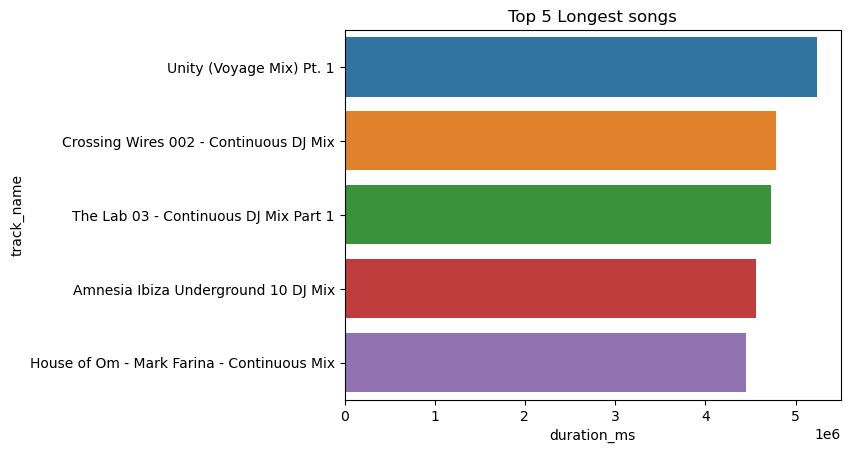

In [24]:
#  4) Top 5 longest songs

sns.barplot(x="duration_ms", y="track_name", data= longest)
plt.title("Top 5 Longest songs")
plt.show()

In [25]:
# 5) Top 5 most trending genre

genre_5 = df[["track_genre", "popularity"]].sort_values(by="popularity", ascending=False)[:5]
genre_5

,track_genre,popularity
81051,pop,100
20001,dance,100
51664,hip-hop,99
68303,latino,98
81210,pop,98


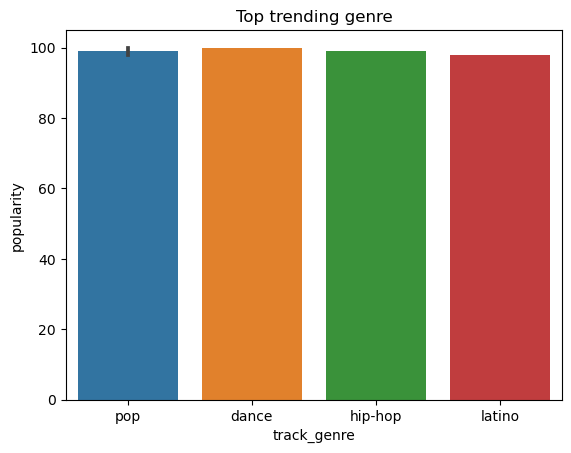

In [26]:
# 5) Top 5 most trending genre

sns.barplot(x="track_genre",y="popularity", data=genre_5)
plt.title("Top trending genre")
plt.show()

In [27]:
# 6) Top 100 most popular songs

sorted_df = df.sort_values('popularity', ascending = False).head(100)
sorted_df.head()

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre
81051,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,pop
20001,3nqQXoyQOWXiESFLlDF1hG,Sam Smith;Kim Petras,Unholy (feat. Kim Petras),Unholy (feat. Kim Petras),100,156943,False,0.714,0.472,2,-7.375,1,0.0864,0.01300,0.000005,0.266,0.238,131.121,4,dance
51664,2tTmW7RDtMQtBk7m2rYeSw,Bizarrap;Quevedo,"Quevedo: Bzrp Music Sessions, Vol. 52","Quevedo: Bzrp Music Sessions, Vol. 52",99,198937,False,0.621,0.782,2,-5.548,1,0.0440,0.01250,0.033000,0.230,0.550,128.033,4,hip-hop
68303,5ww2BF9slyYgNOk37BlC4u,Manuel Turizo,La Bachata,La Bachata,98,162637,False,0.835,0.679,7,-5.329,0,0.0364,0.58300,0.000002,0.218,0.850,124.980,4,latino
81210,4uUG5RXrOk84mYEfFvj3cK,David Guetta;Bebe Rexha,I'm Good (Blue),I'm Good (Blue),98,175238,True,0.561,0.965,7,-3.673,0,0.0343,0.00383,0.000007,0.371,0.304,128.040,4,pop


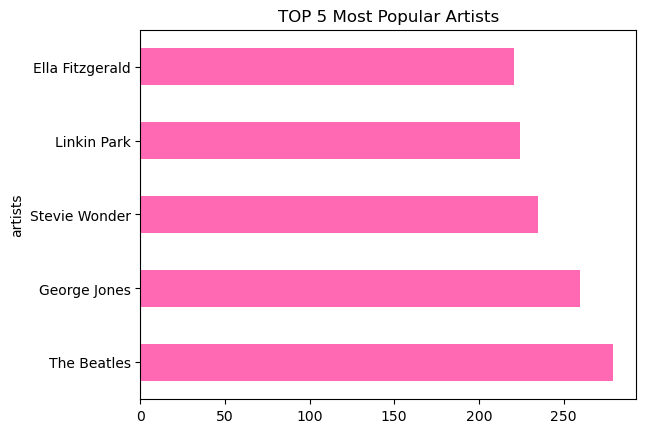

In [30]:

# 7) Top 5 most popular artists

popular_artists = df.groupby("artists").count().sort_values(by='popularity', ascending=False)['popularity'][:5]

popular_artists.plot.barh(color="hotpink") # #visualize the data
plt.title("TOP 5 Most Popular Artists")
plt.show()

C:\Users\emill\AppData\Local\Temp\ipykernel_18748\2851631336.py:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation = df.corr()


<AxesSubplot:>

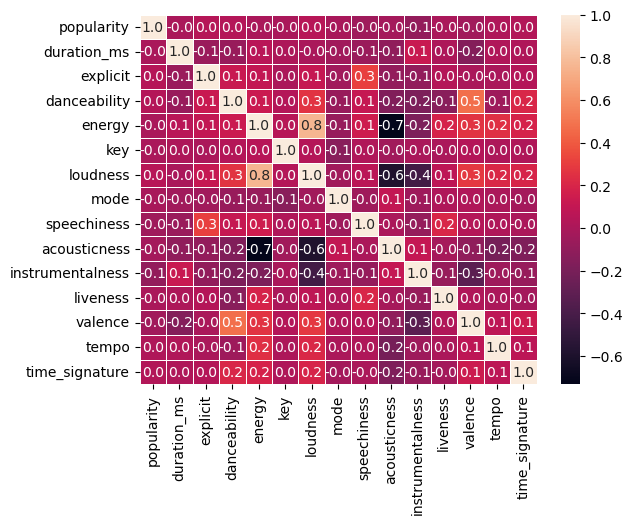

In [31]:
# analyze variable correlation

correlation = df.corr()

# plot the correlation matrix (heatmap)

heat_map = sns.heatmap(correlation, annot=True, fmt=".1f", linewidths=.6)
heat_map

### Data Preprocessing

In [32]:
# convert the popularity column into a binary class (1 for popular, 0 for not popular)

# Defining conditions
conditions = [
    df['popularity'] >= 70,
    df['popularity'] < 70
]

# Defining corresponding values
values = [1, 0]

# Applying numpy.select
df['in_popularity'] = np.select(conditions, values, default=np.nan)

df

,track_id,artists,album_name,track_name,popularity,duration_ms,explicit,danceability,energy,key,...,mode,speechiness,acousticness,instrumentalness,liveness,valence,tempo,time_signature,track_genre,in_popularity
0,5SuOikwiRyPMVoIQDJUgSV,Gen Hoshino,Comedy,Comedy,73,230666,False,0.676,0.4610,1,...,0,0.1430,0.0322,0.000001,0.3580,0.7150,87.917,4,acoustic,1.0
1,4qPNDBW1i3p13qLCt0Ki3A,Ben Woodward,Ghost (Acoustic),Ghost - Acoustic,55,149610,False,0.420,0.1660,1,...,1,0.0763,0.9240,0.000006,0.1010,0.2670,77.489,4,acoustic,0.0
2,1iJBSr7s7jYXzM8EGcbK5b,Ingrid Michaelson;ZAYN,To Begin Again,To Begin Again,57,210826,False,0.438,0.3590,0,...,1,0.0557,0.2100,0.000000,0.1170,0.1200,76.332,4,acoustic,0.0
3,6lfxq3CG4xtTiEg7opyCyx,Kina Grannis,Crazy Rich Asians (Original Motion Picture Sou...,Can't Help Falling In Love,71,201933,False,0.266,0.0596,0,...,1,0.0363,0.9050,0.000071,0.1320,0.1430,181.740,3,acoustic,1.0
4,5vjLSffimiIP26QG5WcN2K,Chord Overstreet,Hold On,Hold On,82,198853,False,0.618,0.4430,2,...,1,0.0526,0.4690,0.000000,0.0829,0.1670,119.949,4,acoustic,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
113995,2C3TZjDRiAzdyViavDJ217,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Sleep My Little Boy,21,384999,False,0.172,0.2350,5,...,1,0.0422,0.6400,0.928000,0.0863,0.0339,125.995,5,world-music,0.0
113996,1hIz5L4IB9hN3WRYPOCGPw,Rainy Lullaby,#mindfulness - Soft Rain for Mindful Meditatio...,Water Into Light,22,385000,False,0.174,0.1170,0,...,0,0.0401,0.9940,0.976000,0.1050,0.0350,85.239,4,world-music,0.0
113997,6x8ZfSoqDjuNa5SVP5QjvX,Cesária Evora,Best Of,Miss Perfumado,22,271466,False,0.629,0.3290,0,...,0,0.0420,0.8670,0.000000,0.0839,0.7430,132.378,4,world-music,0.0
113998,2e6sXL2bYv4bSz6VTdnfLs,Michael W. Smith,Change Your World,Friends,41,283893,False,0.587,0.5060,7,...,1,0.0297,0.3810,0.000000,0.2700,0.4130,135.960,4,world-music,0.0


In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Data columns (total 21 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   track_id          113549 non-null  object 
 1   artists           113549 non-null  object 
 2   album_name        113549 non-null  object 
 3   track_name        113549 non-null  object 
 4   popularity        113549 non-null  int64  
 5   duration_ms       113549 non-null  int64  
 6   explicit          113549 non-null  bool   
 7   danceability      113549 non-null  float64
 8   energy            113549 non-null  float64
 9   key               113549 non-null  int64  
 10  loudness          113549 non-null  float64
 11  mode              113549 non-null  int64  
 12  speechiness       113549 non-null  float64
 13  acousticness      113549 non-null  float64
 14  instrumentalness  113549 non-null  float64
 15  liveness          113549 non-null  float64
 16  valence           11

In [34]:
# Selecting the necessary columns for the model
df_tracks = df.copy()

# Drop the 'popularity' column
df_tracks = df_tracks.drop(columns=['popularity'])

# Manually remove identifier columns
identifiers = ['track_id', 'track_name', 'album_name', 'artists']
df_tracks = df_tracks.drop(columns=identifiers)

# Separate the categorical column 'track_genre' from the other numerical ones
track_genre = df_tracks[['track_genre']]
numerical = df_tracks.drop(columns=['track_genre'])

# Apply OneHotEncoder with parameter compatible with sklearn 1.6.1
from sklearn.preprocessing import OneHotEncoder

encoder = OneHotEncoder(sparse_output=False, handle_unknown='ignore')
encoded_genre = encoder.fit_transform(track_genre)

# Create DataFrame with encoded columns
genre_encoded_df = pd.DataFrame(encoded_genre, columns=encoder.get_feature_names_out(['track_genre']), index=df_tracks.index)

# Concatenate with the remaining variables
df_tracks = pd.concat([numerical, genre_encoded_df], axis=1)

# Display result
df_columns = df_tracks.columns
print(f"Dataset size we'll work with: {df_tracks.shape}")
print(f"New dataset columns: {df_columns}")

Dataset size we'll work with: (113549, 129)
New dataset columns: Index(['duration_ms', 'explicit', 'danceability', 'energy', 'key', 'loudness',
       'mode', 'speechiness', 'acousticness', 'instrumentalness',
       ...
       'track_genre_spanish', 'track_genre_study', 'track_genre_swedish',
       'track_genre_synth-pop', 'track_genre_tango', 'track_genre_techno',
       'track_genre_trance', 'track_genre_trip-hop', 'track_genre_turkish',
       'track_genre_world-music'],
      dtype='object', length=129)


In [43]:
# Convert the 'explicit' variable from boolean to integer

df_tracks['explicit'] = df_tracks['explicit'].astype(int)
df_tracks.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113549 entries, 0 to 113999
Columns: 129 entries, duration_ms to track_genre_world-music
dtypes: float64(124), int32(1), int64(4)
memory usage: 112.2 MB


In [44]:
df_tracks.head(10)

,duration_ms,explicit,danceability,energy,key,loudness,mode,speechiness,acousticness,instrumentalness,...,track_genre_spanish,track_genre_study,track_genre_swedish,track_genre_synth-pop,track_genre_tango,track_genre_techno,track_genre_trance,track_genre_trip-hop,track_genre_turkish,track_genre_world-music
0,230666,0,0.676,0.4610,1,-6.746,0,0.1430,0.0322,0.000001,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,149610,0,0.420,0.1660,1,-17.235,1,0.0763,0.9240,0.000006,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,210826,0,0.438,0.3590,0,-9.734,1,0.0557,0.2100,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,201933,0,0.266,0.0596,0,-18.515,1,0.0363,0.9050,0.000071,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,198853,0,0.618,0.4430,2,-9.681,1,0.0526,0.4690,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,214240,0,0.688,0.4810,6,-8.807,1,0.1050,0.2890,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
6,229400,0,0.407,0.1470,2,-8.822,1,0.0355,0.8570,0.000003,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
7,242946,0,0.703,0.4440,11,-9.331,1,0.0417,0.5590,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
8,189613,0,0.625,0.4140,0,-8.700,1,0.0369,0.2940,0.000000,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
9,205594,0,0.442,0.6320,1,-6.770,1,0.0295,0.4260,0.004190,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [45]:
# Separate features and target
X = df_tracks.drop('in_popularity', axis=1)
y = df_tracks['in_popularity']

0.0    0.951845
1.0    0.048155
Name: in_popularity, dtype: float64


(array([108081.,      0.,      0.,      0.,      0.,      0.,      0.,
             0.,      0.,   5468.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

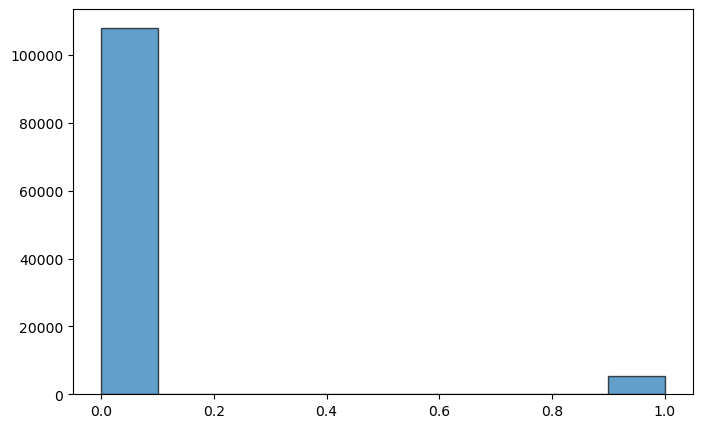

In [47]:
# check target class balance

print(df_tracks['in_popularity'].value_counts(normalize=True))

plt.figure(figsize=(8,5))
plt.hist(df_tracks['in_popularity'], bins=10, edgecolor='black', alpha=0.7)

### > Classification models

In [49]:
# Initialize variables
f1_lr = []
f1_rf = []

# Cross-validation
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

for train_idx, test_idx in skf.split(X, y):
    X_train, X_test = X.iloc[train_idx], X.iloc[test_idx]
    y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

    # Apply StandardScaler
    scaler = StandardScaler()
    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    # SMOTE to balance the classes
    smote = SMOTE(random_state=42)
    X_res, y_res = smote.fit_resample(X_train_scaled, y_train)

    # Logistic Regression
    log_model = LogisticRegression(max_iter=1000, random_state=42)
    log_model.fit(X_res, y_res)
    y_pred_log = log_model.predict(X_test_scaled)
    f1_lr.append(f1_score(y_test, y_pred_log))

    # Random Forest
    rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_model.fit(X_res, y_res)
    y_pred_rf = rf_model.predict(X_test_scaled)
    f1_rf.append(f1_score(y_test, y_pred_rf))

C:\Users\emill\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\emill\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\emill\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `BaseEstimator._validate_data` is deprecated in 1.6 and will be removed in 1.7. Use `sklearn.utils.validation.validate_data` instead. This function becomes public and is part of the scikit-learn developer API.
  warnings.warn(
C:\Users\emill\anaconda3\lib\site-packages\sklearn\base.py:474: FutureWarning: `Ba

In [50]:
# Compare models' F1-Scores
print(f"Average F1-Score – Logistic Regression: {np.mean(f1_lr):.4f}")
print(f"Average F1-Score – Random Forest: {np.mean(f1_rf):.4f}")

Average F1-Score – Logistic Regression: 0.2349
Average F1-Score – Random Forest: 0.4891


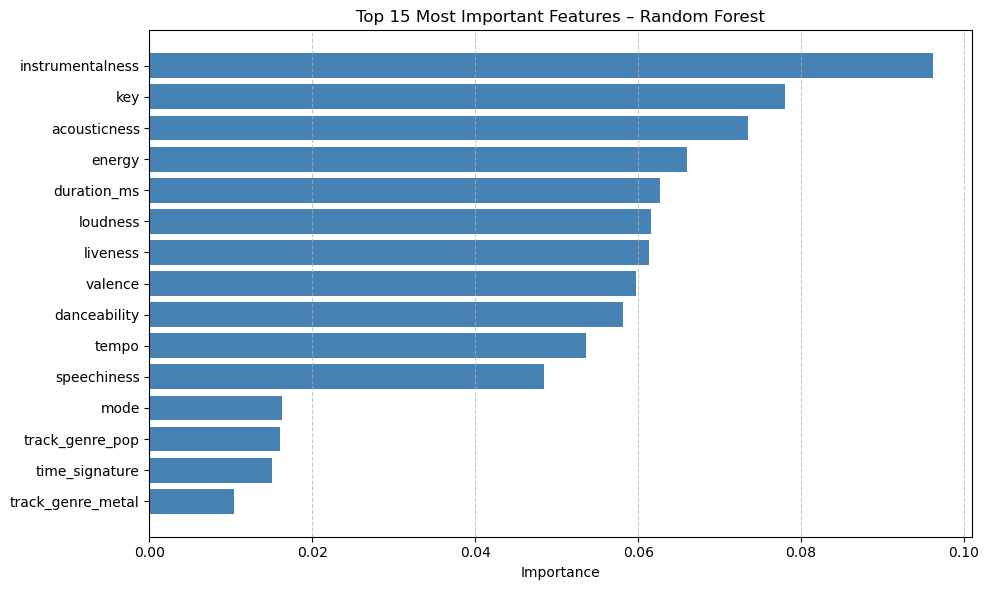

In [53]:
# View feature importance RF Model

importances = rf_model.feature_importances_
feature_importance_df = pd.DataFrame({
    'Feature': X.columns,
    'Importance': importances
}).sort_values(by='Importance', ascending=False).reset_index(drop=True)

# Top 15 most important features
top_15 = feature_importance_df.head(15)

# Visualize
plt.figure(figsize=(10, 6))
plt.barh(top_15['Feature'], top_15['Importance'], color='steelblue')
plt.xlabel("Importance")
plt.title("Top 15 Most Important Features – Random Forest")
plt.gca().invert_yaxis()
plt.grid(axis='x', linestyle='--', alpha=0.7)
plt.tight_layout()
plt.show()

#### >> (EN) Conclusion:  
The goal of this project was to predict the popularity of songs based on Spotify data. To do that, I turned the `popularity` variable into a binary classification (popular songs = popularity ≥ 70) and tested two models: Logistic Regression and Random Forest.

When evaluating the models using the average F1-Score, Random Forest performed better (F1 ≈ 0.49), while Logistic Regression had a lower result (F1 ≈ 0.23).

The final chart shows the most important features for the Random Forest model when predicting song popularity. The top feature was **instrumentalness**, indicating that the presence or absence of vocals has a strong impact on how popular a song is. Next were **key** and **acousticness**, suggesting that harmonic and acoustic elements also influence user behavior. Other relevant features included **energy**, **valence**, **duration_ms**, and **danceability**, which makes sense — more energetic, positive, and danceable songs tend 
to perform better on streaming platforms. Additionally, the presence of features like **track_genre_pop** and **track_genre_metal** among the most important ones shows that music genre also plays a key role in predicting popularity.  

##### Suggestions for next steps:

Test models like XGBoost and fine-tune hyperparameters.  

----------

#### >> (PT) Conclusão:  

O objetivo do projeto foi prever a popularidade de músicas com base em dados do Spotify. Para isso, transformei a variável `popularity` em uma variável binária (músicas populares = popularidade >= 70) e testei dois modelos: Regressão Logística e Random Forest. 
Ao avaliar os modelos com F1-Score médio, o Random Forest teve o melhor desempenho (F1 ≈ 0.49), enquanto a Regressão Logística ficou com um resultado mais baixo (F1 ≈ 0.23). 

O gráfico final mostra as variáveis que mais influenciaram o modelo Random Forest na previsão da popularidade das músicas. A variável mais relevante foi **instrumentalness**, indicando que a presença ou ausência de vocais tem grande impacto na popularidade de uma faixa. Em seguida, aparecem **key** e **acousticness**, sugerindo que elementos harmônicos e o acústico também influenciam bastante no comportamento dos usuários. Variáveis como **energy**, **valence**, **duration_ms** e **danceability** também se destacaram, o que 
faz sentido, já que músicas mais animadas, positivas e dançantes podem ter melhor desempenho nas plataformas de streaming. Além disso, a presença de variáveis como **track_genre_pop** e **track_genre_metal** entre as mais importantes mostra que o gênero musical também tem peso na previsão de popularidade.  


##### Sugestões para os próximos passos:

Testar modelos como XGBoost e ajustar melhor os hiperparâmetros